# Lab 2 - Bayesian concept learning
### Kevin Reece

/Users/kevinjreece/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Enter a comma-separated list of integers between 0 and 100: 34, 56, 23

The most likely concept is:
'all'



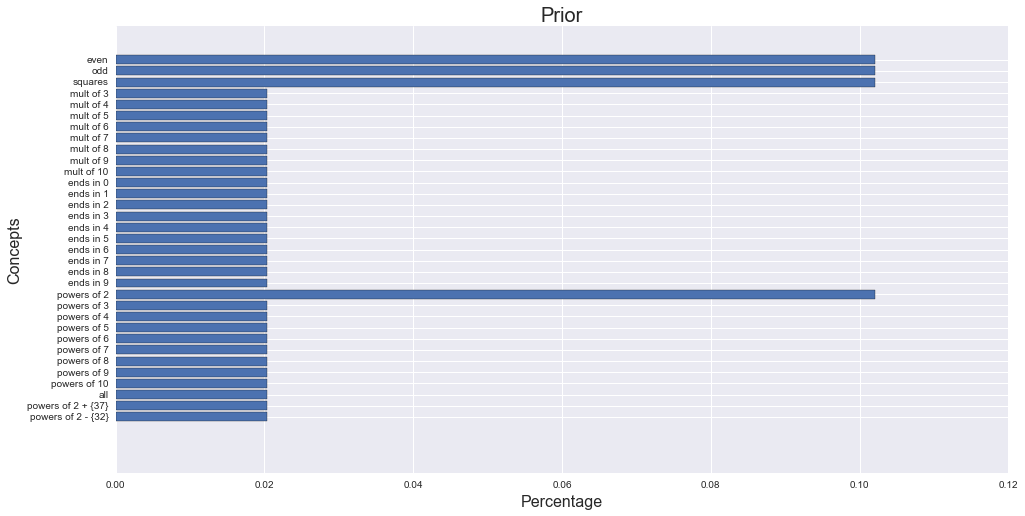

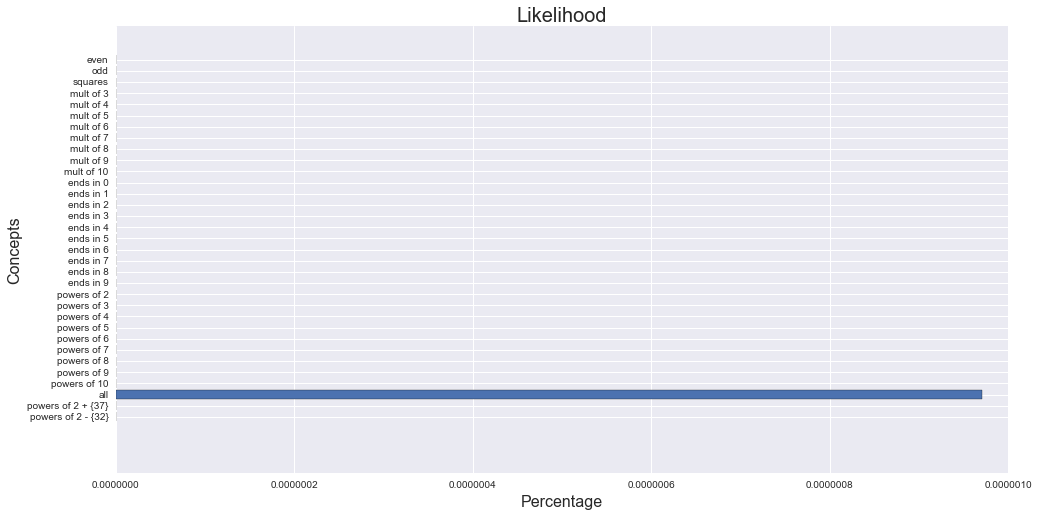

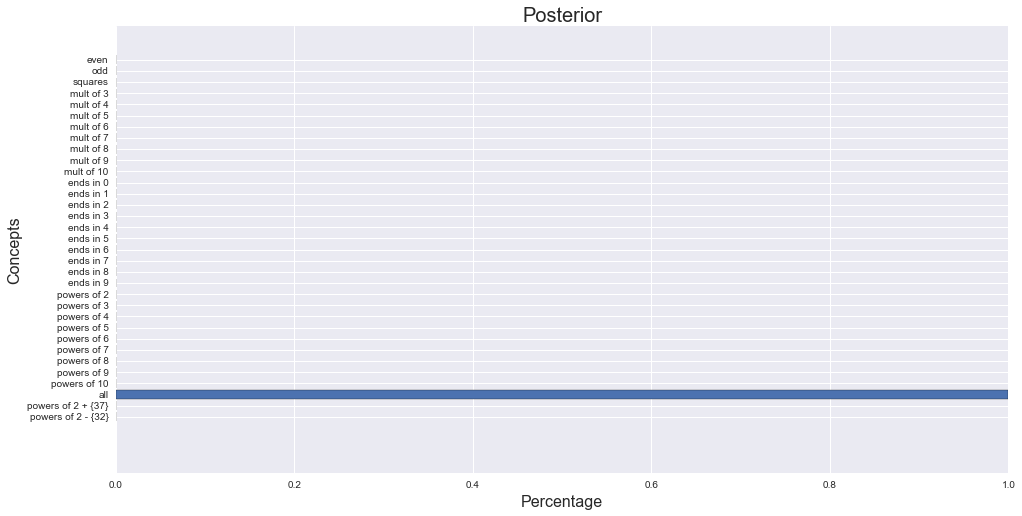

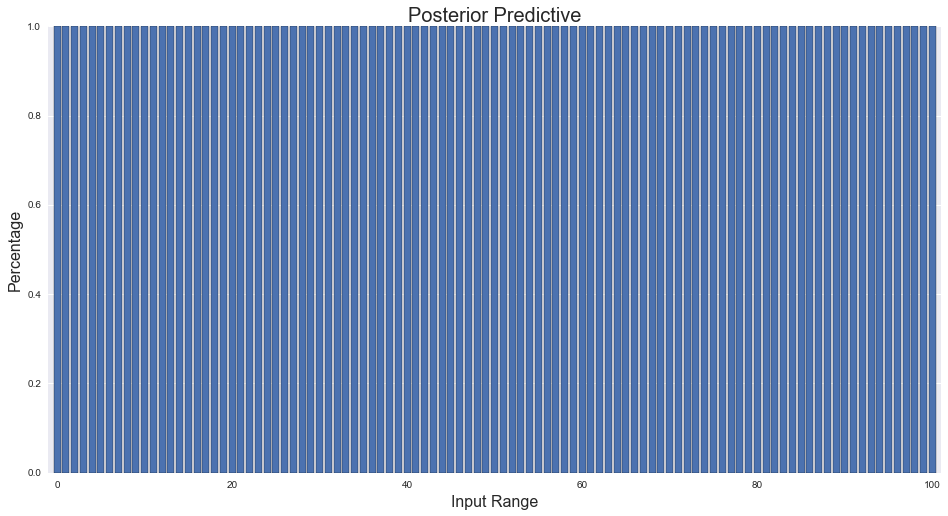

In [1]:
import math
import collections
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
import operator

def isPower (num, base):
    if base == 1 and num != 1: return False
    if base == 1 and num == 1: return True
    if base == 0 and num != 1: return False
    power = int (math.log (num, base) + 0.5)
    return base ** power == num

concept = collections.OrderedDict()
prior = collections.OrderedDict()
ext = collections.OrderedDict()
likely = collections.OrderedDict()
partial_post = collections.OrderedDict()
post = collections.OrderedDict()

# 
# Build defining functions for each concept
#
concept['even'] = lambda x: x % 2 == 0
concept['odd'] = lambda x: x % 2 != 0
concept['squares'] = lambda x: math.sqrt(x) % 1 == 0
concept['mult of 3'] = lambda x: x % 3 == 0
concept['mult of 4'] = lambda x: x % 4 == 0
concept['mult of 5'] = lambda x: x % 5 == 0
concept['mult of 6'] = lambda x: x % 6 == 0
concept['mult of 7'] = lambda x: x % 7 == 0
concept['mult of 8'] = lambda x: x % 8 == 0
concept['mult of 9'] = lambda x: x % 9 == 0
concept['mult of 10'] = lambda x: x % 10 == 0
concept['ends in 0'] = lambda x: x % 10 == 0
concept['ends in 1'] = lambda x: x % 10 == 1
concept['ends in 2'] = lambda x: x % 10 == 2
concept['ends in 3'] = lambda x: x % 10 == 3
concept['ends in 4'] = lambda x: x % 10 == 4
concept['ends in 5'] = lambda x: x % 10 == 5
concept['ends in 6'] = lambda x: x % 10 == 6
concept['ends in 7'] = lambda x: x % 10 == 7
concept['ends in 8'] = lambda x: x % 10 == 8
concept['ends in 9'] = lambda x: x % 10 == 9
concept['powers of 2'] = lambda x: x != 0 and isPower(x, 2)
concept['powers of 3'] = lambda x: x != 0 and isPower(x, 3)
concept['powers of 4'] = lambda x: x != 0 and isPower(x, 4)
concept['powers of 5'] = lambda x: x != 0 and isPower(x, 5)
concept['powers of 6'] = lambda x: x != 0 and isPower(x, 6)
concept['powers of 7'] = lambda x: x != 0 and isPower(x, 7)
concept['powers of 8'] = lambda x: x != 0 and isPower(x, 8)
concept['powers of 9'] = lambda x: x != 0 and isPower(x, 9)
concept['powers of 10'] = lambda x: x != 0 and isPower(x, 10)
concept['all'] = lambda x: x >=0 and x <= 100
concept['powers of 2 + {37}'] = lambda x: x == 37 or (x != 0 and isPower(x, 2))
concept['powers of 2 - {32}'] = lambda x: x != 32 and (x != 0 and isPower(x, 2))

special_prior = ['even', 'odd', 'squares', 'powers of 2']

###
# Get user input
###
var = raw_input("Enter a comma-separated list of integers between 0 and 100: ")
d = [int(x) for x in var.split(',')]
data = filter(lambda x: x >=0 and x <=100,d)

###
# Calculate extension, prior, likelihood, and partial posterior for each concept
###
for name in concept:
    ext[name] = filter(concept[name],range(0, 101))
    prior[name] = float(1.0 / 49) if name not in special_prior else float(5.0 / 49)
    valid = set(data).issubset(set(ext[name]))
    likely[name] = 0 if not valid else (1.0 / len(ext[name])) ** (len(data))
    partial_post[name] = (prior[name] * likely[name])

# Normalize posteriors
post_factor = 1.0 / np.sum(partial_post.values())
for name in partial_post:
    post[name] = post_factor * partial_post[name]
    
###
# Identify and print most likely concept
###
max_post = 0;
max_name = '';

for n,p in post.iteritems():
    if p > max_post:
        max_post = p
        max_name = n

print
print "The most likely concept is:\n'{}'".format(max_name)
print

###
# Calculate posterior predictive distribution
###
predict = []
for x in range(0, 101):
    member = [k for k,v in ext.iteritems() if x in v]
    predict.append(sum([v for k,v in post.iteritems() if k in member]))
    
###
# Plot prior, likelihood, and posterior
###
for name, dist in [('Prior', prior), ('Likelihood', likely), ('Posterior', post)]:
    vals = dist.values()
    vals.reverse()
    keys = dist.keys()
    keys.reverse()

    y_pos = range(len(dist))

    plt.barh(y_pos, vals, align='center')
    plt.yticks(y_pos, keys)
    plt.xlabel('Percentage', fontsize=16)
    plt.ylabel('Concepts', fontsize=16)
    plt.title(name, fontsize=20)
    fig = plt.gcf()
    fig.set_size_inches(16, 8)
    plt.show()
    
###
# Plot posterior predictive distribution
###
pos = range(len(predict))
plt.bar(pos, predict, align='center')
plt.xlabel('Input Range', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.title('Posterior Predictive', fontsize=20)
plt.xlim(-1, 101)
fig = plt.gcf()
fig.set_size_inches(16, 8)
plt.show() 